In [2]:
pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import PIL 
import pathlib
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical  # Updated import path
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

GPU device not found
Found GPU at: 


In [6]:
path_dict = {
    'train_data_dir_normal' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\train\\NORMAL',
    'train_data_dir_pneumonia' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\train\\PNEUMONIA',
    'test_data_dir_normal' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\test\\NORMAL',
    'test_data_dir_pneumonia' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\test\\PNEUMONIA',
    'data_val_dir_normal' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\val\\normal',
    'data_val_dir_pneumonia' : 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\val\\pneumonia'
}


In [42]:
for key, value in path_dict.items():
    path_dict[key] = pathlib.Path(value)



Image preprocessing

In [8]:
X = []
y = []

for key, value in path_dict.items():
    images = list(path_dict[key].glob('*.jpeg'))
    for img in images:
        #reading the image and coverting it into pixels
        image = cv2.imread(str(img))
        #resizing the image to standard pixels
        resized_img = cv2.resize(image, (224, 224))
        X.append(resized_img)
        if 'normal' in key:
            y.append(0) # 0 - normal
        else:
            y.append(1) # 1 - pneumonia
            
X = np.array(X)
y = np.array(y)

In [10]:
import os

dataset_path = "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data"
print("Files in dataset path:", os.listdir(dataset_path))


Files in dataset path: ['test', 'train', 'val']


In [11]:
import tensorflow as tf

def preprocess(image, label):
    # Example: Resize and normalize
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, label


In [23]:
train_generator = datagen.flow_from_directory(
    "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data",
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

X, y = next(train_generator)
print("X shape:", X.shape)  # Should be (16, 224, 224, 3)
print("y shape:", y.shape)  # Should be (16, 3) for 3 classes
print("y values:", y)       # Should show one-hot encoded labels


Found 5872 images belonging to 3 classes.
X shape: (16, 224, 224, 3)
y shape: (16, 3)
y values: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [24]:
print("X shape:", X.shape)  # Should be (16, 224, 224, 3)
print("y shape:", y.shape)  # Should be (16,)


X shape: (16, 224, 224, 3)
y shape: (16, 3)


In [25]:
#data splitting and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 224, 224, 3), (4, 224, 224, 3), (12, 3), (4, 3))

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# Data generator for categorical classification (3 classes)
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data",
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"  # For multi-class classification (3 classes)
)

X, y = next(train_generator)
print("X shape:", X.shape)  # Should be (16, 224, 224, 3)
print("y shape:", y.shape)  # Should be (16, 3) for 3 classes
print("y values:", y)       # Should show one-hot encoded labels

# Data splitting (already normalized)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# No need to apply to_categorical() as y is already one-hot encoded from flow_from_directory

# Normalize images if not done
X_train_scaled = X_train  # Already scaled by ImageDataGenerator
X_test_scaled = X_test    # Already scaled by ImageDataGenerator

# Check the shapes of the datasets again after splitting
print(f"Scaled X_train shape: {X_train_scaled.shape}, Scaled X_test shape: {X_test_scaled.shape}")


Found 5872 images belonging to 3 classes.
X shape: (16, 224, 224, 3)
y shape: (16, 3)
y values: [[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
X_train shape: (12, 224, 224, 3), X_test shape: (4, 224, 224, 3)
y_train shape: (12, 3), y_test shape: (4, 3)
Scaled X_train shape: (12, 224, 224, 3), Scaled X_test shape: (4, 224, 224, 3)


In [ ]:
#model defination and training   first 
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(units = 128 , activation = 'relu'),
    layers.Dense(units = 2 , activation = 'softmax'),
])

model.summary()
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from tensorflow.keras import layers, Sequential

# Model definition
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=3, activation='softmax'),  # Output layer for 3 classes
])

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load ResNet50 pre-trained on ImageNet, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers in the pre-trained model to prevent their weights from being updated during training
base_model.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [10]:
model = models.Sequential([
    base_model,  # Add the pre-trained model
    
    layers.GlobalAveragePooling2D(),  # Global average pooling layer
    
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    
    layers.Dense(2, activation='softmax')  # Output layer (2 classes: normal, pneumonia)
])


In [11]:
model.compile(optimizer=Adam(learning_rate=1e-4),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',     # Categorical cross-entropy for multi-class classification
              metrics=['accuracy'])


In [2]:
# Update the output layer to match the number of classes (3 in this case)
model = models.Sequential([
    base_model,  # Add pre-trained model
    
    layers.GlobalAveragePooling2D(),  # Global average pooling
    
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
# One-hot encode the labels if not already done
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)
# Recompile the model (after adjusting the output layer)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_scaled, 
    y_train,
    batch_size=32,
    epochs=5,  # Train for a few epochs
    validation_data=(X_test_scaled, y_test),
    verbose=1
)




NameError: name 'models' is not defined

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_train_scaled and y_train are already prepared
# 1. Verify data shapes
print("X_train_scaled shape:", X_train_scaled.shape)  # Should be (num_samples, 224, 224, 3)
print("y_train shape:", y_train.shape)               # Should be (num_samples,)

# 2. Split data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42)

print("Training data shape:", X_train_split.shape)
print("Validation data shape:", X_val.shape)

# 3. Create a model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten image input
    Dense(128, activation='relu'),       # Fully connected layer with 128 neurons
    Dropout(0.5),                        # Dropout to prevent overfitting
    Dense(64, activation='relu'),        # Another fully connected layer
    Dropout(0.5),                        # Dropout
    Dense(1, activation='sigmoid')       # Output layer for binary classification
])

# 4. Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 5. Add data augmentation to enhance dataset diversity
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train_split)

# 6. Add Early Stopping to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 7. Train the model
history = model.fit(
    datagen.flow(X_train_split, y_train_split, batch_size=16),  # Train with augmented data
    validation_data=(X_val, y_val),  # Use validation set to monitor generalization
    epochs=50,                       # Train for up to 50 epochs
    callbacks=[early_stopping],      # Stop early if overfitting
    verbose=1                        # Display training progress
)

# 8. Save the model after training
model.save("my_trained_model.h5")

# 9. Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


X_train_scaled shape: (12, 224, 224, 3)
y_train shape: (12, 3, 2)
Training data shape: (9, 224, 224, 3)
Validation data shape: (3, 224, 224, 3)
Epoch 1/50


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 3, 2), output.shape=(None, 1)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you've already defined your image directories for training and validation
train_dir = "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\train"  # Replace with your actual path
test_dir = "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\test"   # Replace with your actual path

# Define ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Create the training and test generators
training_set = train_datagen.flow_from_directory(
    train_dir,  # Path to your training images
    target_size=(64, 64),  # Resize images to the model input size
    batch_size=32,
    class_mode='binary'  # 'binary' for binary classification, change as needed
)

test_set = test_datagen.flow_from_directory(
    test_dir,  # Path to your test images
    target_size=(64, 64),  # Resize images to the model input size
    batch_size=32,
    class_mode='binary'  # 'binary' for binary classification
)

# Now you can fit the model
history = model.fit(
    training_set,
    validation_data=test_set,
    steps_per_epoch=70,  # Number of batches per epoch (adjust as needed)
    epochs=10
)


Found 4684 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 681ms/step - accuracy: 0.8157 - loss: 0.3996 - val_accuracy: 0.9010 - val_loss: 0.2763
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 46s 671ms/step - accuracy: 0.8043 - loss: 0.4114 - val_accuracy: 0.9002 - val_loss: 0.2662
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.8043 - loss: 0.4254 - val_accuracy: 0.8993 - val_loss: 0.2673
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 668ms/step - accuracy: 0.7963 - loss: 0.4122 - val_accuracy: 0.8387 - val_loss: 0.3409
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 46s 664ms/step - accuracy: 0.8221 - loss: 0.3985 - val_accuracy: 0.8823 - val_loss: 0.2817
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.7546 - loss: 0.4669 - val_accuracy: 0.8686 - val_loss: 0.3083
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 685ms/step - accuracy: 0.8138 - loss: 0.3896 - val_accuracy: 0.8737 - val_loss: 0.3022
Epoch 8/10
70

In [32]:
#balance dataset
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))


Class distribution: {np.int32(0): np.int64(498), np.int32(1): np.int64(502)}


In [60]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 0.8738 - loss: 0.3029
Test Accuracy: 0.88


In [61]:
# Save the trained model
model.save("my_trained_model_80_accuracy.keras")


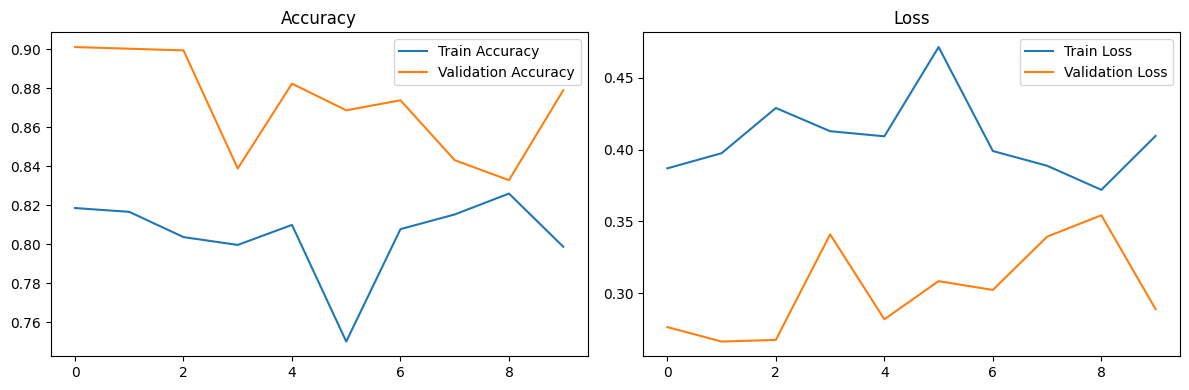

In [62]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [58]:
model.fit(X_train_scaled, y_train, epochs=10)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 12
'y' sizes: 700


In [59]:
# model evaluation
model.evaluate(X_test_scaled, y_test)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 4
'y' sizes: 150


In [63]:
#prediction
y_pred = model.predict(X_test)
y_pred[:5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 483ms/step


array([[0.999623  ],
       [0.9996227 ],
       [0.9996228 ],
       [0.99962175],
       [0.9996225 ]], dtype=float32)

In [64]:
y_pred_scaled = []
y_test_scaled = []
for x in y_pred:
    if x[0] == 1:
        y_pred_scaled.append(0)
    else:
        y_pred_scaled.append(1)
for x in y_test:
    if x[0] == 1:
        y_test_scaled.append(0)
    else:
        y_test_scaled.append(1)
y_pred_scaled = np.array(y_pred_scaled)
y_test_scaled = np.array(y_test_scaled)

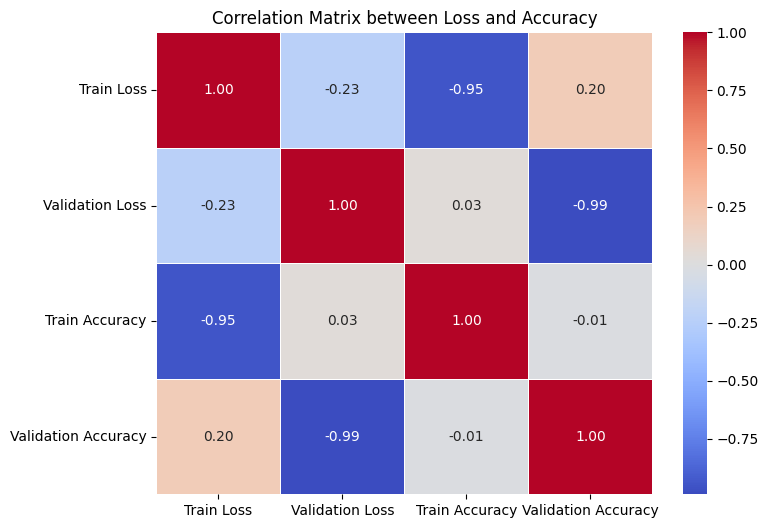

In [67]:
# Assuming `history` contains the history object returned by model.fit()
# Extract the relevant values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a DataFrame to hold loss and accuracy values
metrics_data = pd.DataFrame({
    'Train Loss': train_loss,
    'Validation Loss': val_loss,
    'Train Accuracy': train_accuracy,
    'Validation Accuracy': val_accuracy
})

# Calculate the correlation matrix
corr_matrix_metrics = metrics_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_metrics, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Loss and Accuracy')
plt.show()


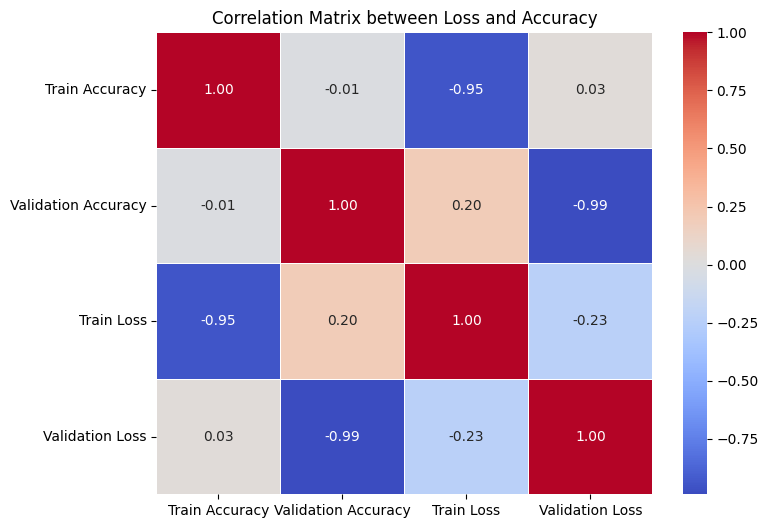

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming history contains the history object returned by model.fit()
# Extract the relevant values from history.history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a DataFrame to hold accuracy and loss values
metrics_data = pd.DataFrame({
    'Train Accuracy': train_accuracy,
    'Validation Accuracy': val_accuracy,
    'Train Loss': train_loss,
    'Validation Loss': val_loss
})

# Calculate the correlation matrix
corr_matrix_metrics = metrics_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_metrics, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Loss and Accuracy')
plt.show()


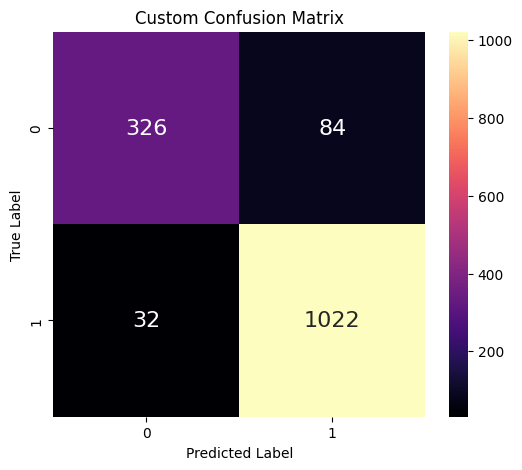

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your custom matrix
custom_matrix = np.array([[326, 84], [32, 1022]])

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(custom_matrix, annot=True, fmt="d", cmap="magma", cbar=True, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Custom Confusion Matrix")
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step


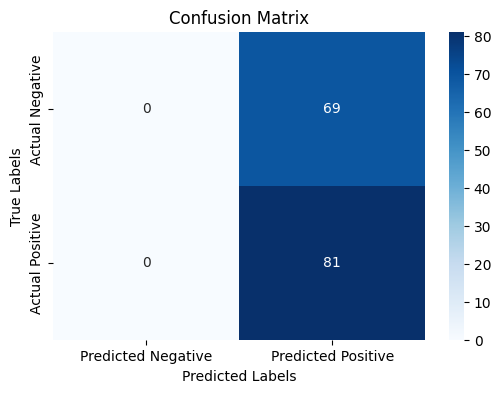

Confusion Matrix:
[[ 0 69]
 [ 0 81]]


In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels and y_pred contains the predicted labels
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # For binary classification, convert to 0 or 1

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Model defined and compiled.
Loading image from C:\Users\DELL\Downloads\reu lime\new pic\Data\test\NORMAL\NORMAL(1269).jpg
Starting LIME explanation...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 10%|█         | 10/100 [00:00<00:01, 45.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|██        | 20/100 [00:00<00:01, 54.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 30%|███       | 30/100 [00:00<00:01, 55.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 40/100 [00:00<00:01, 55.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 50%|█████     | 50/100 [00:00<00:00, 57.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 60%|██████    | 60/100 [00:01<00:00, 55.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 70%|███████   | 70/100 [00:01<00:00, 54.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 80%|████████  | 80/100 [00:01<00:00, 56.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 90%|█████████ | 90/100 [00:01<00:00, 57.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


100%|██████████| 100/100 [00:01<00:00, 54.34it/s]

LIME explanation completed.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Model prediction: Pneumonia with confidence score: 0.52


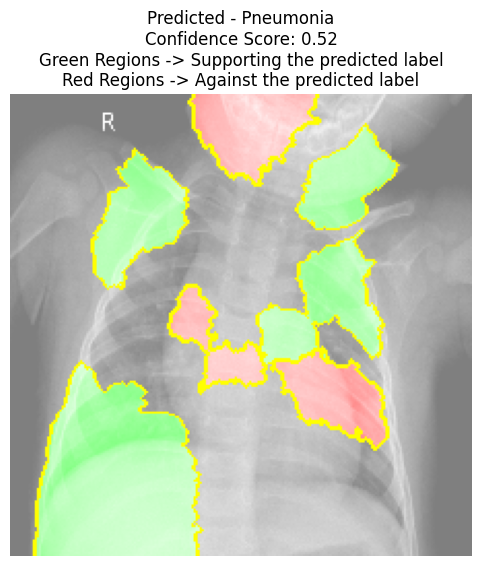

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the model architecture if you haven't loaded a pre-trained one
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model defined and compiled.")

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    print(f"Loading image from {image_path}")
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img

# Function to explain image with LIME and print the prediction
def explain_image_with_label(image, model):
    print("Starting LIME explanation...")
    explainer = lime_image.LimeImageExplainer()

    # Use a lower number of samples to speed up processing
    explanation = explainer.explain_instance(
        image.astype('double'),
        model.predict,
        top_labels=2,
        hide_color=0,
        num_samples=100  # Reduced to make it faster
    )
    print("LIME explanation completed.")

    # Get prediction probabilities
    predicted_probs = model.predict(image.reshape(1, 224, 224, 3))
    predicted_label = predicted_probs.argmax(axis=1)[0]
    confidence_score = np.max(predicted_probs)  # Confidence score for the predicted label

    # Print model prediction and confidence score
    label = 'Pneumonia' if predicted_label == 1 else 'Normal'
    print(f"Model prediction: {label} with confidence score: {confidence_score:.2f}")

    # Get LIME mask and overlay for visualization
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,
        num_features=10,
        hide_rest=False
    )
    
    # Display the LIME explanation
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Predicted - {label}\n'
              f'Confidence Score: {confidence_score:.2f}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Prompt for user input for the image path
image_path = input("Enter the full path to the image: ")
input_image = load_and_preprocess_image(image_path)

# Run the explanation and display the results
explain_image_with_label(input_image, model)


### Explainations

In [ ]:
#lime for image explanation

In [ ]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def explain_image(image, index):
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(image.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title('Predicted - ' + str('Normal' if y_pred_scaled[index] == 0 else 'Pneumonia') + '\n Ground Truth - ' + str('Normal' if y_test_scaled[index] == 0 else 'Pneumonia')
             + ' \n Green Regions -> Supporting the predicted label \n Red Regions -> Against the predicted label')
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


  1%|          | 10/1000 [00:00<00:27, 35.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  2%|▏         | 20/1000 [00:00<00:27, 35.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  3%|▎         | 30/1000 [00:00<00:24, 40.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  4%|▍         | 40/1000 [00:00<00:21, 43.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 50/1000 [00:01<00:21, 44.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  6%|▌         | 60/1000 [00:01<00:20, 45.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 70/1000 [00:01<00:19, 47.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  8%|▊         | 80/1000 [00:01<00:18, 48.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 90/1000 [00:02<00:19, 46.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|█         | 100/1000 [00:02<00:20, 43.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 110/1000 [00:02<00:20, 44.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 12%|█▏        | 120/1000 [00:02<00:19, 44.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|█▎        | 130/1000 [00:02<00:19, 44.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 140/1000 [00:03<00:18, 46.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▌        | 150/1000 [00:03<00:17, 49.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▌        | 160/1000 [00:03<00:16, 50.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 170/1000 [00:03<00:16, 50.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 180/1000 [00:03<00:16, 50.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▉        | 190/1000 [00:04<00:16, 50.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 20%|██        | 200/1000 [00:04<00:16, 50.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██        | 210/1000 [00:04<00:16, 48.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 22%|██▏       | 220/1000 [00:04<00:17, 44.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 230/1000 [00:05<00:17, 44.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 240/1000 [00:05<00:16, 45.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 250/1000 [00:05<00:15, 46.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 26%|██▌       | 260/1000 [00:05<00:16, 44.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|██▋       | 270/1000 [00:05<00:16, 45.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██▊       | 280/1000 [00:06<00:15, 46.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 29%|██▉       | 290/1000 [00:06<00:15, 46.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 30%|███       | 300/1000 [00:06<00:15, 45.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|███       | 310/1000 [00:06<00:15, 45.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 320/1000 [00:06<00:14, 45.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 33%|███▎      | 330/1000 [00:07<00:14, 45.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 340/1000 [00:07<00:14, 44.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 350/1000 [00:07<00:14, 46.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|███▌      | 360/1000 [00:07<00:14, 44.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 370/1000 [00:08<00:13, 45.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 380/1000 [00:08<00:13, 45.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 390/1000 [00:08<00:12, 47.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 400/1000 [00:08<00:12, 47.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████      | 410/1000 [00:08<00:12, 48.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 420/1000 [00:09<00:12, 48.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 430/1000 [00:09<00:11, 48.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 44%|████▍     | 440/1000 [00:09<00:12, 46.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|████▌     | 450/1000 [00:09<00:11, 46.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 460/1000 [00:09<00:11, 48.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 470/1000 [00:10<00:10, 48.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 48%|████▊     | 480/1000 [00:10<00:10, 47.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 49%|████▉     | 490/1000 [00:10<00:11, 43.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 50%|█████     | 500/1000 [00:10<00:11, 42.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 51%|█████     | 510/1000 [00:11<00:11, 43.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 52%|█████▏    | 520/1000 [00:11<00:10, 45.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████▎    | 530/1000 [00:11<00:10, 46.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▍    | 540/1000 [00:11<00:09, 46.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 55%|█████▌    | 550/1000 [00:11<00:09, 47.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 56%|█████▌    | 560/1000 [00:12<00:09, 48.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|█████▋    | 570/1000 [00:12<00:08, 47.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 58%|█████▊    | 580/1000 [00:12<00:08, 47.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 59%|█████▉    | 590/1000 [00:12<00:08, 48.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 60%|██████    | 600/1000 [00:12<00:08, 47.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 61%|██████    | 610/1000 [00:13<00:08, 47.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 62%|██████▏   | 620/1000 [00:13<00:08, 45.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 63%|██████▎   | 630/1000 [00:13<00:07, 47.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 64%|██████▍   | 640/1000 [00:13<00:07, 46.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 65%|██████▌   | 650/1000 [00:14<00:07, 45.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 66%|██████▌   | 660/1000 [00:14<00:07, 46.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 67%|██████▋   | 670/1000 [00:14<00:07, 46.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 68%|██████▊   | 680/1000 [00:14<00:06, 46.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 69%|██████▉   | 690/1000 [00:14<00:06, 47.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 70%|███████   | 700/1000 [00:15<00:06, 47.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 71%|███████   | 710/1000 [00:15<00:06, 47.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 72%|███████▏  | 720/1000 [00:15<00:05, 48.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 73%|███████▎  | 730/1000 [00:15<00:05, 49.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 49.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 75%|███████▌  | 750/1000 [00:16<00:05, 47.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 76%|███████▌  | 760/1000 [00:16<00:05, 47.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 77%|███████▋  | 770/1000 [00:16<00:04, 47.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 78%|███████▊  | 780/1000 [00:16<00:04, 48.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 79%|███████▉  | 790/1000 [00:16<00:04, 45.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|████████  | 800/1000 [00:17<00:04, 46.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 81%|████████  | 810/1000 [00:17<00:04, 46.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 82%|████████▏ | 820/1000 [00:17<00:03, 47.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████▎ | 830/1000 [00:17<00:03, 47.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 84%|████████▍ | 840/1000 [00:18<00:03, 46.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 85%|████████▌ | 850/1000 [00:18<00:03, 48.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|████████▌ | 860/1000 [00:18<00:02, 48.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 87%|████████▋ | 870/1000 [00:18<00:02, 50.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 44.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|████████▉ | 890/1000 [00:19<00:02, 47.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 90%|█████████ | 900/1000 [00:19<00:02, 49.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 91%|█████████ | 910/1000 [00:19<00:01, 50.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 92%|█████████▏| 920/1000 [00:19<00:01, 50.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 49.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 94%|█████████▍| 940/1000 [00:20<00:01, 48.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 95%|█████████▌| 950/1000 [00:20<00:01, 48.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 96%|█████████▌| 960/1000 [00:20<00:00, 48.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|█████████▋| 970/1000 [00:20<00:00, 46.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 46.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 99%|█████████▉| 990/1000 [00:21<00:00, 49.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


100%|██████████| 1000/1000 [00:21<00:00, 46.73it/s]


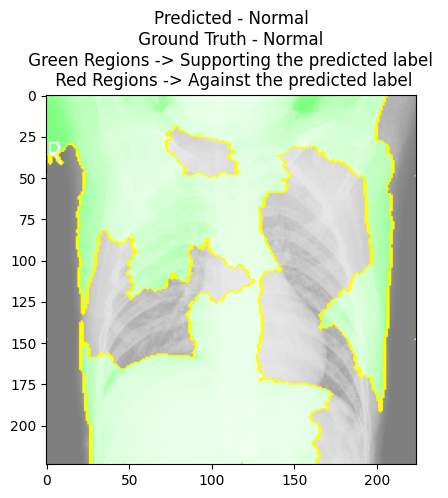

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  1%|          | 10/1000 [00:00<00:20, 48.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|▏         | 20/1000 [00:00<00:20, 48.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  3%|▎         | 30/1000 [00:00<00:21, 44.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▍         | 40/1000 [00:00<00:21, 44.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 50/1000 [00:01<00:20, 45.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|▌         | 60/1000 [00:01<00:19, 48.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 70/1000 [00:01<00:18, 51.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 80/1000 [00:01<00:17, 51.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▉         | 90/1000 [00:01<00:19, 47.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|█         | 100/1000 [00:02<00:18, 48.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|█         | 110/1000 [00:02<00:17, 50.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 120/1000 [00:02<00:17, 50.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 130/1000 [00:02<00:17, 50.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▍        | 140/1000 [00:02<00:17, 49.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 15%|█▌        | 150/1000 [00:03<00:16, 50.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 160/1000 [00:03<00:16, 51.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 17%|█▋        | 170/1000 [00:03<00:15, 52.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 18%|█▊        | 180/1000 [00:03<00:15, 52.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▉        | 190/1000 [00:03<00:15, 53.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 20%|██        | 200/1000 [00:04<00:16, 49.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|██        | 210/1000 [00:04<00:15, 50.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|██▏       | 220/1000 [00:04<00:14, 52.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 230/1000 [00:04<00:14, 52.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 240/1000 [00:04<00:14, 52.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▌       | 250/1000 [00:04<00:14, 51.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▌       | 260/1000 [00:05<00:15, 48.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 27%|██▋       | 270/1000 [00:05<00:15, 47.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██▊       | 280/1000 [00:05<00:14, 49.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 290/1000 [00:05<00:14, 49.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|███       | 300/1000 [00:06<00:14, 47.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 310/1000 [00:06<00:14, 48.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 320/1000 [00:06<00:13, 50.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|███▎      | 330/1000 [00:06<00:12, 51.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 340/1000 [00:06<00:12, 51.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 350/1000 [00:06<00:12, 52.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 36%|███▌      | 360/1000 [00:07<00:13, 49.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 370/1000 [00:07<00:13, 48.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 380/1000 [00:07<00:12, 49.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 390/1000 [00:07<00:12, 48.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 400/1000 [00:08<00:12, 49.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 410/1000 [00:08<00:12, 45.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████▏     | 420/1000 [00:08<00:12, 46.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 430/1000 [00:08<00:12, 45.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 440/1000 [00:08<00:11, 47.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▌     | 450/1000 [00:09<00:11, 46.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████▌     | 460/1000 [00:09<00:11, 46.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 470/1000 [00:09<00:11, 45.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|████▊     | 480/1000 [00:09<00:11, 45.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▉     | 490/1000 [00:10<00:11, 45.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 50%|█████     | 500/1000 [00:10<00:11, 43.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 51%|█████     | 510/1000 [00:10<00:11, 40.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 52%|█████▏    | 520/1000 [00:10<00:13, 36.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 53%|█████▎    | 530/1000 [00:11<00:11, 39.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 54%|█████▍    | 540/1000 [00:11<00:11, 41.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 55%|█████▌    | 550/1000 [00:11<00:10, 41.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 56%|█████▌    | 560/1000 [00:11<00:10, 40.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 57%|█████▋    | 570/1000 [00:12<00:10, 42.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|█████▊    | 580/1000 [00:12<00:09, 44.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 59%|█████▉    | 590/1000 [00:12<00:09, 45.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 60%|██████    | 600/1000 [00:12<00:08, 46.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 61%|██████    | 610/1000 [00:12<00:08, 46.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 62%|██████▏   | 620/1000 [00:13<00:08, 47.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 63%|██████▎   | 630/1000 [00:13<00:09, 40.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 64%|██████▍   | 640/1000 [00:13<00:08, 43.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 65%|██████▌   | 650/1000 [00:13<00:07, 44.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|██████▌   | 660/1000 [00:13<00:07, 46.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 67%|██████▋   | 670/1000 [00:14<00:06, 47.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 68%|██████▊   | 680/1000 [00:14<00:06, 48.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 69%|██████▉   | 690/1000 [00:14<00:06, 49.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 70%|███████   | 700/1000 [00:14<00:06, 48.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 71%|███████   | 710/1000 [00:14<00:05, 50.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 72%|███████▏  | 720/1000 [00:15<00:05, 49.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 73%|███████▎  | 730/1000 [00:15<00:05, 47.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 48.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 75%|███████▌  | 750/1000 [00:15<00:05, 48.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|███████▌  | 760/1000 [00:16<00:04, 48.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 77%|███████▋  | 770/1000 [00:16<00:04, 49.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 78%|███████▊  | 780/1000 [00:16<00:04, 49.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 79%|███████▉  | 790/1000 [00:16<00:04, 47.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 80%|████████  | 800/1000 [00:16<00:04, 48.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 81%|████████  | 810/1000 [00:17<00:03, 48.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|████████▏ | 820/1000 [00:17<00:03, 46.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 83%|████████▎ | 830/1000 [00:17<00:04, 42.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|████████▍ | 840/1000 [00:17<00:03, 44.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 85%|████████▌ | 850/1000 [00:17<00:03, 43.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|████████▌ | 860/1000 [00:18<00:03, 45.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 87%|████████▋ | 870/1000 [00:18<00:02, 46.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 44.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 89%|████████▉ | 890/1000 [00:18<00:02, 44.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 90%|█████████ | 900/1000 [00:19<00:02, 47.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 91%|█████████ | 910/1000 [00:19<00:01, 49.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|█████████▏| 920/1000 [00:19<00:01, 49.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 46.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 47.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 95%|█████████▌| 950/1000 [00:20<00:01, 48.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 96%|█████████▌| 960/1000 [00:20<00:00, 49.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 97%|█████████▋| 970/1000 [00:20<00:00, 51.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 48.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 99%|█████████▉| 990/1000 [00:20<00:00, 46.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


100%|██████████| 1000/1000 [00:21<00:00, 47.31it/s]


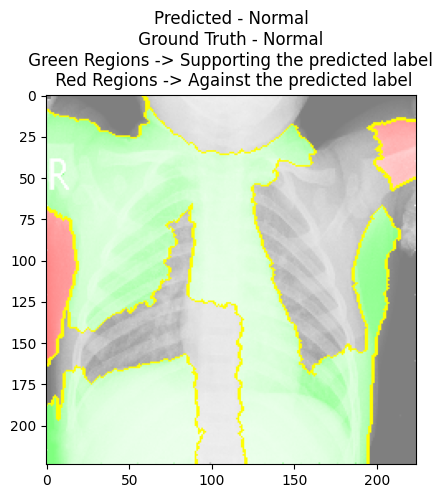

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  1%|          | 10/1000 [00:00<00:21, 45.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  2%|▏         | 20/1000 [00:00<00:20, 47.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  3%|▎         | 30/1000 [00:00<00:21, 46.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  4%|▍         | 40/1000 [00:00<00:20, 46.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▌         | 50/1000 [00:01<00:20, 46.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 60/1000 [00:01<00:20, 46.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|▋         | 70/1000 [00:01<00:19, 47.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 80/1000 [00:01<00:18, 48.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 90/1000 [00:01<00:18, 49.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 10%|█         | 100/1000 [00:02<00:18, 47.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 110/1000 [00:02<00:18, 48.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 120/1000 [00:02<00:17, 49.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|█▎        | 130/1000 [00:02<00:17, 49.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|█▍        | 140/1000 [00:02<00:16, 50.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▌        | 150/1000 [00:03<00:17, 47.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 160/1000 [00:03<00:17, 46.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 170/1000 [00:03<00:17, 48.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 180/1000 [00:03<00:17, 48.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 190/1000 [00:03<00:17, 47.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|██        | 200/1000 [00:04<00:18, 43.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 210/1000 [00:04<00:17, 43.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 220/1000 [00:04<00:17, 44.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 230/1000 [00:04<00:16, 46.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 240/1000 [00:05<00:16, 46.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▌       | 250/1000 [00:05<00:16, 46.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 26%|██▌       | 260/1000 [00:05<00:16, 43.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 270/1000 [00:05<00:16, 44.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 280/1000 [00:06<00:15, 45.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 290/1000 [00:06<00:15, 45.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 30%|███       | 300/1000 [00:06<00:16, 42.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 31%|███       | 310/1000 [00:06<00:15, 44.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 320/1000 [00:06<00:14, 46.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|███▎      | 330/1000 [00:07<00:13, 48.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 340/1000 [00:07<00:13, 48.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 350/1000 [00:07<00:13, 48.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▌      | 360/1000 [00:07<00:13, 48.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 37%|███▋      | 370/1000 [00:07<00:13, 47.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 380/1000 [00:08<00:13, 47.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|███▉      | 390/1000 [00:08<00:14, 41.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 40%|████      | 400/1000 [00:08<00:14, 41.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 410/1000 [00:08<00:13, 43.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 420/1000 [00:09<00:13, 44.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 43%|████▎     | 430/1000 [00:09<00:12, 45.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 44%|████▍     | 440/1000 [00:09<00:12, 45.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▌     | 450/1000 [00:09<00:11, 47.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 460/1000 [00:09<00:11, 46.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 470/1000 [00:10<00:11, 45.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 48%|████▊     | 480/1000 [00:10<00:12, 41.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▉     | 490/1000 [00:10<00:12, 42.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 50%|█████     | 500/1000 [00:10<00:11, 42.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|█████     | 510/1000 [00:11<00:11, 43.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 52%|█████▏    | 520/1000 [00:11<00:10, 43.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 53%|█████▎    | 530/1000 [00:11<00:10, 45.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 54%|█████▍    | 540/1000 [00:11<00:10, 42.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 55%|█████▌    | 550/1000 [00:12<00:10, 44.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 56%|█████▌    | 560/1000 [00:12<00:09, 44.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|█████▋    | 570/1000 [00:12<00:08, 48.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 58%|█████▊    | 580/1000 [00:12<00:08, 51.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 59%|█████▉    | 590/1000 [00:12<00:07, 54.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 60%|██████    | 600/1000 [00:12<00:07, 54.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 61%|██████    | 610/1000 [00:13<00:07, 51.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 62%|██████▏   | 620/1000 [00:13<00:07, 53.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 63%|██████▎   | 630/1000 [00:13<00:06, 54.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 64%|██████▍   | 640/1000 [00:13<00:06, 55.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|██████▌   | 650/1000 [00:13<00:06, 54.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 66%|██████▌   | 660/1000 [00:14<00:06, 55.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 67%|██████▋   | 670/1000 [00:14<00:06, 53.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 68%|██████▊   | 680/1000 [00:14<00:06, 48.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 69%|██████▉   | 690/1000 [00:14<00:06, 44.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 70%|███████   | 700/1000 [00:14<00:06, 46.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 71%|███████   | 710/1000 [00:15<00:05, 50.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 72%|███████▏  | 720/1000 [00:15<00:05, 46.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 73%|███████▎  | 730/1000 [00:15<00:05, 46.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 46.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 75%|███████▌  | 750/1000 [00:16<00:05, 45.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 76%|███████▌  | 760/1000 [00:16<00:05, 41.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 77%|███████▋  | 770/1000 [00:16<00:05, 44.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 78%|███████▊  | 780/1000 [00:16<00:05, 43.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 79%|███████▉  | 790/1000 [00:16<00:04, 43.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 80%|████████  | 800/1000 [00:17<00:04, 43.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 81%|████████  | 810/1000 [00:17<00:04, 44.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 82%|████████▏ | 820/1000 [00:17<00:03, 45.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████▎ | 830/1000 [00:17<00:03, 46.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 84%|████████▍ | 840/1000 [00:18<00:03, 47.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 85%|████████▌ | 850/1000 [00:18<00:03, 47.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 86%|████████▌ | 860/1000 [00:18<00:03, 43.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 87%|████████▋ | 870/1000 [00:18<00:02, 47.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 45.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 89%|████████▉ | 890/1000 [00:19<00:02, 44.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 90%|█████████ | 900/1000 [00:19<00:02, 45.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 91%|█████████ | 910/1000 [00:19<00:01, 47.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|█████████▏| 920/1000 [00:19<00:01, 48.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 93%|█████████▎| 930/1000 [00:20<00:01, 45.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 94%|█████████▍| 940/1000 [00:20<00:01, 47.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 95%|█████████▌| 950/1000 [00:20<00:01, 48.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 96%|█████████▌| 960/1000 [00:20<00:00, 49.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 97%|█████████▋| 970/1000 [00:20<00:00, 52.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 52.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 99%|█████████▉| 990/1000 [00:21<00:00, 55.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


100%|██████████| 1000/1000 [00:21<00:00, 46.97it/s]


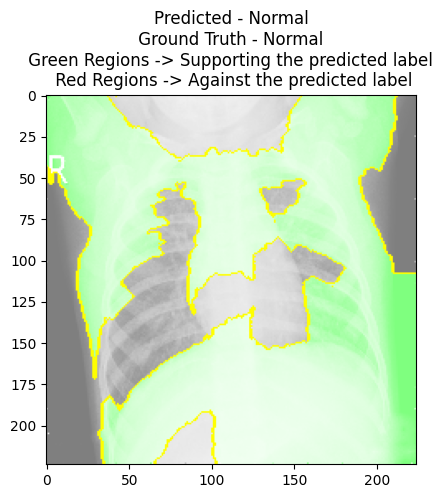

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  1%|          | 10/1000 [00:00<00:21, 45.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  2%|▏         | 20/1000 [00:00<00:20, 47.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  3%|▎         | 30/1000 [00:00<00:20, 47.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  4%|▍         | 40/1000 [00:00<00:20, 46.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 50/1000 [00:01<00:20, 45.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  6%|▌         | 60/1000 [00:01<00:21, 44.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  7%|▋         | 70/1000 [00:01<00:21, 42.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 80/1000 [00:01<00:20, 44.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  9%|▉         | 90/1000 [00:02<00:20, 44.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|█         | 100/1000 [00:02<00:18, 48.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 110/1000 [00:02<00:17, 50.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 120/1000 [00:02<00:16, 52.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 13%|█▎        | 130/1000 [00:02<00:16, 54.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▍        | 140/1000 [00:02<00:15, 56.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 15%|█▌        | 150/1000 [00:03<00:14, 57.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 16%|█▌        | 160/1000 [00:03<00:14, 59.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 170/1000 [00:03<00:13, 60.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 180/1000 [00:03<00:13, 60.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▉        | 190/1000 [00:03<00:15, 53.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|██        | 200/1000 [00:03<00:14, 54.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 210/1000 [00:04<00:14, 56.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 22%|██▏       | 220/1000 [00:04<00:13, 57.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 230/1000 [00:04<00:13, 57.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 240/1000 [00:04<00:12, 58.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▌       | 250/1000 [00:04<00:12, 58.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 26%|██▌       | 260/1000 [00:04<00:13, 53.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|██▋       | 270/1000 [00:05<00:13, 54.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 28%|██▊       | 280/1000 [00:05<00:12, 57.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 29%|██▉       | 290/1000 [00:05<00:11, 59.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 30%|███       | 300/1000 [00:05<00:11, 60.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 310/1000 [00:05<00:11, 59.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 32%|███▏      | 320/1000 [00:06<00:14, 47.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 330/1000 [00:06<00:13, 48.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 340/1000 [00:06<00:16, 39.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 350/1000 [00:06<00:14, 43.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 36%|███▌      | 360/1000 [00:07<00:14, 44.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 370/1000 [00:07<00:14, 43.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 38%|███▊      | 380/1000 [00:07<00:14, 41.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▉      | 390/1000 [00:07<00:15, 39.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 40%|████      | 400/1000 [00:08<00:14, 42.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 41%|████      | 410/1000 [00:08<00:13, 42.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 420/1000 [00:08<00:13, 43.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 430/1000 [00:08<00:12, 44.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|████▍     | 440/1000 [00:08<00:11, 46.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 45%|████▌     | 450/1000 [00:09<00:11, 48.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 46%|████▌     | 460/1000 [00:09<00:11, 45.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 470/1000 [00:09<00:10, 48.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|████▊     | 480/1000 [00:09<00:10, 48.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 49%|████▉     | 490/1000 [00:09<00:11, 46.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 50%|█████     | 500/1000 [00:10<00:10, 46.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 51%|█████     | 510/1000 [00:10<00:11, 42.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 52%|█████▏    | 520/1000 [00:10<00:10, 44.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 53%|█████▎    | 530/1000 [00:10<00:10, 44.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 54%|█████▍    | 540/1000 [00:11<00:10, 44.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 55%|█████▌    | 550/1000 [00:11<00:10, 44.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 56%|█████▌    | 560/1000 [00:11<00:09, 45.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 57%|█████▋    | 570/1000 [00:11<00:10, 42.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 58%|█████▊    | 580/1000 [00:11<00:09, 46.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 59%|█████▉    | 590/1000 [00:12<00:08, 49.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 60%|██████    | 600/1000 [00:12<00:07, 52.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 61%|██████    | 610/1000 [00:12<00:07, 54.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 62%|██████▏   | 620/1000 [00:12<00:08, 46.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 63%|██████▎   | 630/1000 [00:12<00:08, 45.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 64%|██████▍   | 640/1000 [00:13<00:07, 48.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 65%|██████▌   | 650/1000 [00:13<00:07, 47.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 66%|██████▌   | 660/1000 [00:13<00:07, 45.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|██████▋   | 670/1000 [00:13<00:07, 43.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|██████▊   | 680/1000 [00:14<00:06, 46.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 69%|██████▉   | 690/1000 [00:14<00:06, 47.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 70%|███████   | 700/1000 [00:14<00:06, 48.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 71%|███████   | 710/1000 [00:14<00:05, 48.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 72%|███████▏  | 720/1000 [00:14<00:05, 47.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 73%|███████▎  | 730/1000 [00:15<00:05, 48.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 74%|███████▍  | 740/1000 [00:15<00:05, 45.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 75%|███████▌  | 750/1000 [00:15<00:05, 48.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 76%|███████▌  | 760/1000 [00:15<00:04, 48.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 77%|███████▋  | 770/1000 [00:15<00:05, 41.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 78%|███████▊  | 780/1000 [00:16<00:04, 46.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 79%|███████▉  | 790/1000 [00:16<00:04, 50.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 80%|████████  | 800/1000 [00:16<00:03, 50.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 81%|████████  | 810/1000 [00:16<00:03, 55.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 82%|████████▏ | 820/1000 [00:16<00:03, 54.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 83%|████████▎ | 830/1000 [00:17<00:03, 52.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 84%|████████▍ | 840/1000 [00:17<00:03, 50.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 85%|████████▌ | 850/1000 [00:17<00:03, 46.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|████████▌ | 860/1000 [00:17<00:02, 47.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 87%|████████▋ | 870/1000 [00:17<00:02, 50.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 88%|████████▊ | 880/1000 [00:18<00:02, 47.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|████████▉ | 890/1000 [00:18<00:02, 47.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 90%|█████████ | 900/1000 [00:18<00:02, 47.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|█████████ | 910/1000 [00:18<00:01, 48.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 92%|█████████▏| 920/1000 [00:18<00:01, 52.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 93%|█████████▎| 930/1000 [00:19<00:01, 50.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 94%|█████████▍| 940/1000 [00:19<00:01, 53.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 95%|█████████▌| 950/1000 [00:19<00:00, 55.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 96%|█████████▌| 960/1000 [00:19<00:00, 55.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 97%|█████████▋| 970/1000 [00:19<00:00, 52.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 98%|█████████▊| 980/1000 [00:20<00:00, 49.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 99%|█████████▉| 990/1000 [00:20<00:00, 51.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


100%|██████████| 1000/1000 [00:20<00:00, 48.94it/s]


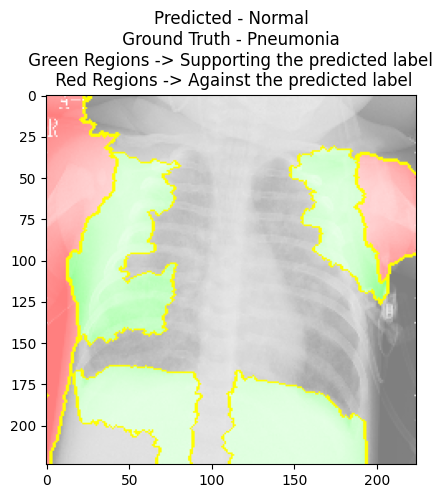

In [ ]:
for index, img in enumerate(X_test_scaled[:5]):
    explain_image(img, index)

In [ ]:
y_pred_scaled[0]

np.int64(0)

FINAL PREDICTION


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model defined and compiled.
Loading image from C:\Users\DELL\Downloads\new reu\new pic\Data\train\PNEUMONIA\PNEUMONIA(4).jpg
Starting LIME explanation...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|█         | 10/100 [00:00<00:02, 31.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 20%|██        | 20/100 [00:00<00:02, 36.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|███       | 30/100 [00:00<00:01, 36.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|████      | 40/100 [00:01<00:01, 37.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 50%|█████     | 50/100 [00:01<00:01, 40.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 60%|██████    | 60/100 [00:01<00:00, 42.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|███████   | 70/100 [00:01<00:00, 41.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|████████  | 80/100 [00:01<00:00, 42.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|█████████ | 90/100 [00:02<00:00, 43.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


100%|██████████| 100/100 [00:02<00:00, 41.29it/s]

LIME explanation completed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Model prediction: Normal


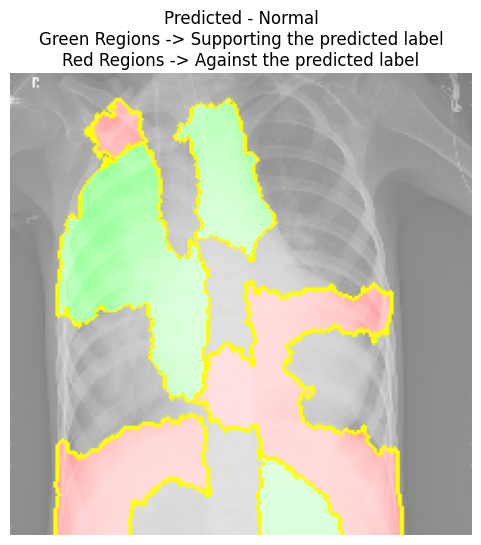

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the model architecture if you haven't loaded a pre-trained one
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model defined and compiled.")

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    print(f"Loading image from {image_path}")
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img

# Function to explain image with LIME and print the prediction
def explain_image_with_label(image, model):
    print("Starting LIME explanation...")
    explainer = lime_image.LimeImageExplainer()

    # Use a lower number of samples to speed up processing
    explanation = explainer.explain_instance(
        image.astype('double'),
        model.predict,
        top_labels=2,
        hide_color=0,
        num_samples=100  # Reduced to make it faster
    )
    print("LIME explanation completed.")

    # Predict the label
    predicted_label = model.predict(image.reshape(1, 224, 224, 3)).argmax(axis=1)[0]
    print(f"Model prediction: {'Pneumonia' if predicted_label == 1 else 'Normal'}")

    # Get LIME mask and overlay for visualization
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,
        num_features=10,
        hide_rest=False
    )
    
    # Display the LIME explanation
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Predicted - {"Pneumonia" if predicted_label == 1 else "Normal"}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Prompt for user input for the image path
image_path = input("Enter the full path to the image: ")
input_image = load_and_preprocess_image(image_path)

# Run the explanation and display the results
explain_image_with_label(input_image, model)


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model defined and compiled.
Loading image from C:\Users\DELL\Downloads\reu lime\new pic\Data\train\PNEUMONIA\PNEUMONIA(1).jpg
Starting LIME explanation...


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 10%|█         | 10/100 [00:00<00:04, 19.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 20%|██        | 20/100 [00:00<00:02, 34.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 30%|███       | 30/100 [00:00<00:01, 37.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 40%|████      | 40/100 [00:01<00:01, 46.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 50%|█████     | 50/100 [00:01<00:00, 56.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 60%|██████    | 60/100 [00:01<00:00, 58.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 70%|███████   | 70/100 [00:01<00:00, 64.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 80%|████████  | 80/100 [00:01<00:00, 69.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 90%|█████████ | 90/100 [00:01<00:00, 73.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


100%|██████████| 100/100 [00:01<00:00, 56.07it/s]

LIME explanation completed.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Model prediction: Pneumonia


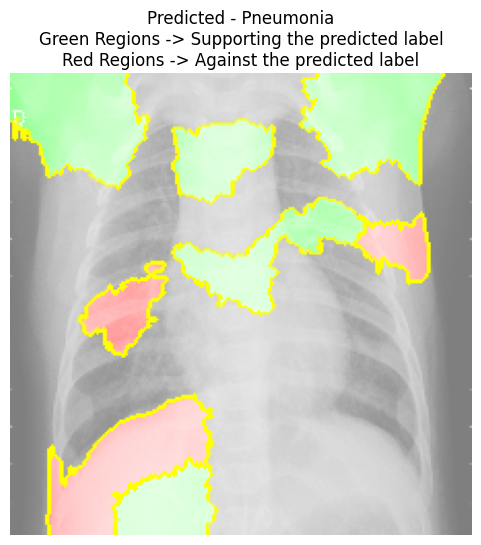

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Define the model architecture if you haven't loaded a pre-trained one
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Model defined and compiled.")

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    print(f"Loading image from {image_path}")
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    return img

# Function to explain image with LIME and print the prediction
def explain_image_with_label(image, model):
    print("Starting LIME explanation...")
    explainer = lime_image.LimeImageExplainer()

    # Use a lower number of samples to speed up processing
    explanation = explainer.explain_instance(
        image.astype('double'),
        model.predict,
        top_labels=2,
        hide_color=0,
        num_samples=100  # Reduced to make it faster
    )
    print("LIME explanation completed.")

    # Predict the label
    predicted_label = model.predict(image.reshape(1, 224, 224, 3)).argmax(axis=1)[0]
    print(f"Model prediction: {'Pneumonia' if predicted_label == 1 else 'Normal'}")

    # Get LIME mask and overlay for visualization
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=False,
        num_features=10,
        hide_rest=False
    )
    
    # Display the LIME explanation
    plt.figure(figsize=(6, 6))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Predicted - {"Pneumonia" if predicted_label == 1 else "Normal"}\n'
              'Green Regions -> Supporting the predicted label\n'
              'Red Regions -> Against the predicted label')
    plt.axis('off')
    plt.show()

# Prompt for user input for the image path
image_path = input("Enter the full path to the image: ")
input_image = load_and_preprocess_image(image_path)

# Run the explanation and display the results
explain_image_with_label(input_image, model)


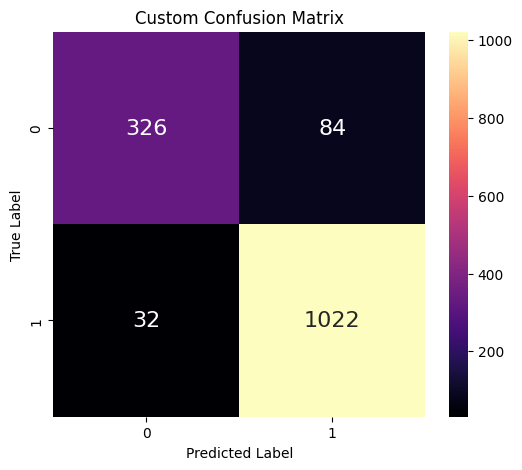

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define your custom matrix
custom_matrix = np.array([[326, 84], [32, 1022]])

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(custom_matrix, annot=True, fmt="d", cmap="magma", cbar=True, annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Custom Confusion Matrix")
plt.show()


In [ ]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set paths to your dataset folder
train_dir = 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\train'  # Update with the actual path

# ImageDataGenerator for training with data augmentation (optional)
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize the image values to between 0 and 1
    rotation_range=40,         # Random rotation
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    shear_range=0.2,           # Random shear
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Random horizontal flip
    fill_mode='nearest'        # Fill missing pixels after transformations
)

# Flow the images from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),       # Resize images to 150x150
    batch_size=32,
    class_mode='binary'           # Use 'categorical' if there are more than 2 classes
)

# Define the model (CNN architecture)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu6', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu6'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu6'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu6'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50  # You can adjust the number of epochs as needed
)

# Save the trained model
model.save('my_trained_model.h5')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\DELL\\Downloads\\new reu\\new pic\\Data\\train'

new

In [23]:
pip install tensorflow opencv-python matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import os
import pathlib
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
path_dict = {
    'train_data_dir_normal': "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\train\\NORMAL",
    'train_data_dir_pneumonia': "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\train\\PNEUMONIA",
    'test_data_dir_normal': "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\test\\NORMAL",
    'test_data_dir_pneumonia': "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\test\\PNEUMONIA",
    'data_val_dir_normal': "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\val\\normal",
    'data_val_dir_pneumonia': "C:\\Users\\DELL\\Downloads\\reu lime\\new pic\\Data\\val\\pneumonia"
}


In [27]:
from pathlib import Path

X = []
y = []

# Loop through the paths in path_dict
for key, value in path_dict.items():
    # Convert string to Path object
    path = Path(value)
    
    # Use glob to get all .jpeg files in the directory
    images = list(path.glob('*.jpeg'))
    
    # Process each image
    for img in images:
        # Read and resize the image
        image = cv2.imread(str(img))
        resized_img = cv2.resize(image, (224, 224))
        X.append(resized_img)
        
        # Label based on directory name (normal or pneumonia)
        if 'normal' in key:
            y.append(0)  # 0 - normal
        else:
            y.append(1)  # 1 - pneumonia

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)


In [ ]:
from tensorflow.keras.utils import to_categorical

X = []
y = []

# Loop through the paths in path_dict
for key, value in path_dict.items():
    path = Path(value)  # Convert string to Path object
    
    # Use glob to get all .jpeg files in the directory
    images = list(path.glob('*.jpeg'))
    
    for img in images:
        image = cv2.imread(str(img))  # Read image
        resized_img = cv2.resize(image, (224, 224))  # Resize image to 224x224
        X.append(resized_img)
        
        # Assign label (0 for normal, 1 for pneumonia)
        if 'normal' in key:
            y.append(0)  # Label for normal class
        else:
            y.append(1)  # Label for pneumonia class

X = np.array(X)
y = np.array(y)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=2)  # 2 classes: normal (0) and pneumonia (1)

# Print the shapes of X and y
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (16, 224, 224, 3), y shape: (16, 2)


In [30]:
import numpy as np
import cv2

X = []
y = []

for key, value in path_dict.items():
    path = Path(value)  # Convert string to Path object
    
    images = list(path.glob('*.jpeg'))
    
    for img in images:
        image = cv2.imread(str(img))  # Read image
        resized_img = cv2.resize(image, (224, 224))  # Resize image to 224x224
        X.append(resized_img)
        
        # Create a segmentation mask (binary: 0 for normal, 1 for pneumonia)
        mask = np.zeros((224, 224, 3), dtype=np.uint8)
        
        if 'normal' in key:
            mask[:, :] = [0, 0, 0]  # 0 for normal (black mask)
        else:
            mask[:, :] = [255, 255, 255]  # 1 for pneumonia (white mask)
        
        y.append(mask)

X = np.array(X)  # Shape: (num_samples, 224, 224, 3)
y = np.array(y)  # Shape: (num_samples, 224, 224, 3)

print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (16, 224, 224, 3), y shape: (16, 224, 224, 3)


In [31]:
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (16, 224, 224, 3), y shape: (16, 224, 224, 3)


In [32]:
pip install lime


Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer (2 classes: normal, pneumonia)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=20,         # Number of epochs
    batch_size=32,     # Batch size
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[checkpoint, early_stopping],  # Callbacks to use
    verbose=1  # Print progress
)

# Save the final model if desired
model.save('final_model.keras')

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 3, 3, 3, 3, 3, 3, 3), output.shape=(None, 3)